In [22]:
from googletrans import Translator #pip install -U deep_translator
import pandas as pd
import numpy as np
import Levenshtein
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator
import textstat #https://pypi.org/project/textstat/

In [2]:
ls data

en-es-sorted-en.txt     en-es.tmx               en-fr-sorted-pairs.txt
en-es-sorted-es.txt     en-fr-sorted-en.txt     en-fr.tmx
en-es-sorted-pairs.txt  en-fr-sorted-fr.txt


In [3]:
with open('data/en-es-sorted-en.txt') as f:
    lines = f.readlines()

In [4]:
en = pd.DataFrame(data = {'Phrase':lines})

In [17]:
len(en)

1714910

In [5]:
en['Phrase'] = en['Phrase'].str[:-1]

In [6]:
en['PhraseLength'] = en.apply(lambda row: len(row['Phrase']), axis = 1)

In [7]:
def word_count(row):
    return(len(row['Phrase'].split()))

In [8]:
en['WordCount'] = en.apply(lambda row: word_count(row), axis = 1)

In [9]:
en_sub = en[(en['WordCount'] >= 3) & (en['WordCount'] <= 20)]

In [10]:
def alphanumeric_percent(row):
    letters = len([x for x in row['Phrase'] if x.isalpha()])
    return(letters/len(row['Phrase'].replace(' ','')))

In [11]:
en_sub['AlphaNumeric%'] = en_sub.apply(lambda row: alphanumeric_percent(row), axis = 1)

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
sub2 = en_sub[en_sub['AlphaNumeric%'] > 0.975]

In [14]:
sub3 = sub2.iloc[:10000]

In [18]:
sub3['Readability'] = sub3.apply(lambda row: textstat.flesch_reading_ease(row['Phrase']), axis = 1)
#The table is an example of values. While the maximum score is 121.22, there is no limit on how low
#the score can be. A negative score is valid. Higher score = easier to read
sub3['GradeLevel'] = sub3.apply(lambda row: textstat.flesch_kincaid_grade(row['Phrase']), axis = 1)
#Returns the Flesch-Kincaid Grade of the given text. This is a grade formula in that a score of 9.3
#means that a ninth grader would be able to read the document.

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
sub3.describe()

,PhraseLength,WordCount,AlphaNumeric%,Readability,GradeLevel
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.691300,8.374000,0.976599,64.735266,6.316520
std,2.559465,1.267077,0.002136,25.880458,3.399286
min,13.000000,3.000000,0.975610,-93.330000,-2.700000
25%,49.000000,8.000000,0.975610,46.440000,3.700000
50%,50.000000,8.000000,0.976190,69.790000,6.000000
75%,51.000000,9.000000,0.976744,85.690000,8.800000
max,52.000000,12.000000,1.000000,119.190000,27.300000


In [28]:
temp2 = sub3.groupby(['WordCount'], as_index = False).agg({'Phrase':'count', 'PhraseLength':'mean',
                                                   'Readability':'mean', 'GradeLevel':'mean'})

In [24]:
sub3.to_csv('EnglishPhrasesList.csv')

In [29]:
temp2

,WordCount,Phrase,PhraseLength,Readability,GradeLevel
0,3,30,20.833333,43.330333,7.943333
1,4,27,36.185185,25.742593,10.662963
2,5,110,44.000000,6.568364,13.575455
3,6,472,47.836864,18.752839,12.149364
4,7,1592,48.797111,43.844209,8.884108
5,8,3019,49.656840,61.115260,6.730010
6,9,2967,50.322548,76.624894,4.810347
7,10,1475,50.934915,85.187756,3.876136
8,11,285,51.442105,91.845368,3.184211
9,12,23,52.000000,100.128696,2.291304


Text(0.5, 1.0, 'Readability and Grade Level By Phrase Word Count')

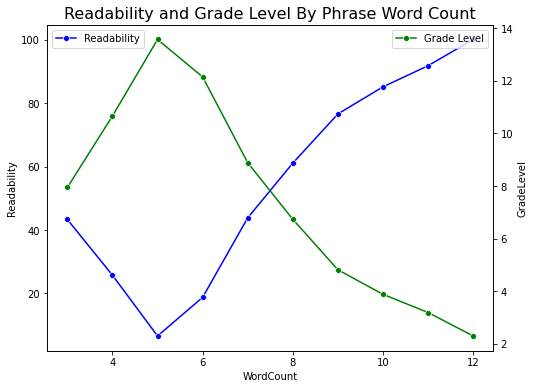

In [45]:
fig, ax = plt.subplots(figsize = (8,6))
ax2 = ax.twinx()
sns.lineplot(data = temp2, x = 'WordCount', y = 'Readability', marker = 'o', ax = ax, color = 'b',
             label = 'Readability')
sns.lineplot(data = temp2, x = 'WordCount', y = 'GradeLevel', marker = 'o', ax = ax2, color = 'g',
             label = 'Grade Level')
plt.legend()
plt.title('Readability and Grade Level By Phrase Word Count', size = 16)